# Week 10: Machine learning and hypothesis testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


We will be loading and preparing the recording from last week:

In [8]:
# recording = np.load('../Week09/recording.npy') # ".." here refers to the parent directory
recording = np.load('recording.npy') #
from sklearn.decomposition import PCA
pca = PCA(n_components=20, whiten=True)
pca.fit(recording.T)
components = pca.components_
df_components = pd.DataFrame(components.T)
df_components = df_components.add_prefix('comp_')
#img_index = np.load('../Week09/img_index.npy')
img_index = np.load('img_index.npy')
df_components['img_index'] = img_index.astype(str)

## Support vector machines

How differently do the recordings represent repeated presentations of different images? One way of answering this question is by trying to predict which image each data point is representing.

<Axes: xlabel='comp_0', ylabel='comp_1'>

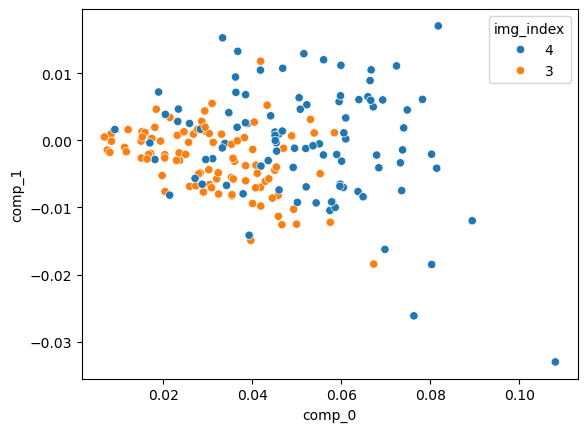

In [9]:
sns.scatterplot(data=df_components[np.isin(df_components['img_index'], ['3', '4'])], x='comp_0', y='comp_1', hue='img_index')

We may want to ask two questions about this plot:
1. What is the best way to predict a new data point?
2. Do these neurons actually contain information about the data points?

Let's start with the first question.

## Support vector machines

Build a support vector machine that tries to predict whether a particular response represents image 1 or 2. Below we're extracting the responses to those two images:

In [10]:
components_subset = components[:,np.isin(df_components['img_index'], ['3', '4'])]
img_index_subset = df_components['img_index'][np.isin(df_components['img_index'], ['3', '4'])]

In [11]:
train_x = components_subset[:,:150]
train_y = img_index_subset[:150]
test_x = components_subset[:,150:]
test_y = img_index_subset[150:]

In [12]:
test_x.shape

(20, 42)

First, let's go through the intuition behind an SVM (see whiteboard).

Now let's try to find out (together) how we can fit an SVM!

The below code was found from here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [13]:
# Fit the SVM

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(train_x.T, train_y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,1e-05


In [14]:
# Compute its accuracy on the test set

np.mean(clf.predict(test_x.T) == test_y)

np.float64(1.0)

In [15]:
test_y

376    4
377    3
382    3
383    4
386    3
387    4
390    4
394    3
397    3
398    4
402    3
403    4
406    3
408    4
410    3
411    4
416    3
417    4
422    3
424    4
426    3
429    4
430    3
431    4
438    3
439    4
443    4
444    3
445    4
449    3
451    3
454    4
455    4
457    3
462    3
464    4
465    4
468    3
473    4
474    3
477    4
478    3
Name: img_index, dtype: object

## Problem: Modify this pipeline

C: float, default=1.0

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

In [16]:
# Fit the SVM

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5, C=1.0))
clf.fit(train_x.T, train_y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,1e-05


In [17]:
# Compute its accuracy on the test set

np.mean(clf.predict(test_x.T) == test_y)

np.float64(1.0)

Look at sklearn and try to modify the prediction, either by changing an argument to the SVC method or by using a different predictor. How does this change the predictor?

In [18]:
test_y

376    4
377    3
382    3
383    4
386    3
387    4
390    4
394    3
397    3
398    4
402    3
403    4
406    3
408    4
410    3
411    4
416    3
417    4
422    3
424    4
426    3
429    4
430    3
431    4
438    3
439    4
443    4
444    3
445    4
449    3
451    3
454    4
455    4
457    3
462    3
464    4
465    4
468    3
473    4
474    3
477    4
478    3
Name: img_index, dtype: object

# Hypothesis testing

Wonderful! Our predictor had above-chance performance! But of course, we might have also gotten lucky. Imagine trying to predict a coin toss: you may say "heads" and get lucky. Despite your 100% accuracy, that doesn't actually mean that you knew how the coin was going to land.

This brings us into the realm of statistical hypothesis testing, which asks whether the results we're seeing could have been due to chance rather than any actual signal.

Hypothesis testing generally implements the following logic:
1. You formulate a baseline hypothesis.
2. You ask how likely your observation would have been under that baseline hypothesis.
3. If it is below a certain threshold, you reject the hypothesis.

## Random sampling

In this context, we often want to be able to sample from random distributions. Numpy has useful functionality for this purpose.

In [19]:
# Sampling a number from a normal distribution
np.random.normal()

-0.829583596382548

In [20]:
# Sampling 100 numbers from a normal distribution
np.random.normal(size=100)

array([ 0.29604423,  0.903593  , -0.88744392, -1.29525802,  0.49170877,
        0.37503357,  0.89728223, -0.05548377,  1.39651372, -0.43673772,
        0.8594288 ,  0.58930533, -0.75390656,  0.59278201, -0.8161699 ,
       -1.16681393, -0.27358915,  0.35739387, -0.78956289, -1.00832919,
       -0.47681724, -0.22410386,  0.23990701, -1.55329263, -0.57841555,
        0.15673481,  1.81854862, -0.29907652,  0.64507872, -1.55890802,
       -0.73061978,  1.82872165, -0.29510518, -1.03737223,  0.60789533,
        0.48558067,  0.5605836 ,  1.13121231,  1.37497386, -0.47225584,
        0.53595275, -1.53471569,  0.88190689,  0.26670496, -1.07893356,
        1.03572973, -0.75890059,  0.17083395, -0.88064671,  1.78166197,
        0.61048153, -0.73928032,  1.60204803,  1.52818944, -0.55565843,
        0.48622789,  1.1088083 , -0.37404523, -0.5810138 , -0.28416349,
       -1.17793503, -1.20266983,  0.92731869,  0.30036918,  1.04503498,
        0.56444208,  0.24790041, -0.56375965,  0.25433778, -2.61

In [21]:
# Shuffling an array
array = np.array([1, 2, 3, 4, 5])
np.random.shuffle(array)
array

array([1, 5, 4, 3, 2])

Notably, we often want to be able to reproduce an analysis where we randomly sample. Of course, in general this is not the case:

In [23]:
np.random.normal()

0.28623139457048463

In [24]:
np.random.normal()

-0.14014265830308714

Two ensure such reproducibility, we can define random states:

In [26]:
random_state = np.random.RandomState(seed=42) # seed = the "rule" that you use to generate your random number
random_state.normal()

0.4967141530112327

Now re-running the same code results in the same value:

In [27]:
random_state = np.random.RandomState(seed=42)
random_state.normal()

0.4967141530112327

Note that this doesn't mean that we always get the same value!!

In [28]:
random_state.normal()

-0.13826430117118466

Rather from when we define the random state, the same numbers are returned in sequence. This might feel strange --- how can random sampling even be reproducible? In that case it isn't random? Indeed, pretty much all random sampling isn't random, but rather "pseudo-random". This means that for all intents and purposes, we cannot distinguish these sequences from random sequences.

For an accurate model of how this might work, imagine you decide to sample from a binary variable. You are terrible at coming up with random numbers (aren't we all? look up Benford's law!) and so you decide to implement a "pseudo-random" sampler: you look at your clock and if the seconds are even you choose "1", if they are odd you choose "0". In this case, the seconds on your clock are your "random seed" and if you knew the seconds you can exactly reproduce your decision. However, for all intents and purposes, your decision was random.

Now let's look at how hypothesis testing works, gradually increasing our complexity:

## 1 Did we draw our sample from a normal distribution around zero?

I tell you that I've either sampled a specific value from a normal distribution around zero or that I haven't. I tell you that I've sampled the number "2". Do you believe me?

In [29]:
value = 2

### What is our baseline hypothesis?

In [34]:
samples = np.random.normal(size=10000)
samples

array([-0.37126295,  1.10519226, -0.18073101, ...,  2.08924906,
        0.26466931,  0.79412999], shape=(10000,))

In [36]:
np.mean(np.abs(samples)>=value)

np.float64(0.0448)

### How likely would this observation have been under our hypothesis?

Fortunately, we don't actually need to implement this via sampling, since we know the normal distribution and we know that $P(|Z|>2)<0.05$.

### p-hacking!!

Notably, the above logic doesn't work anymore if we run many different hypothesis tests, e.g. by sampling over and over again:

In [55]:
random_state.normal()

1.465648768921554

This illustrates the danger of "p-hacking": you may want to look for different hypotheses, refining what you're looking for based on what you think is significant. If you do this without any further pre-caution, you may find an actual signal in your data --- but you might also just be sampling over and over again. There are different ways of preventing this:
1. Adjust your threshold of significance.
2. Explore different hypotheses while holding out a test set that you only look at once you've identified a specific hypothesis.

### t-tests

We may ask if certain components differ in their representation of different indices.

In [56]:
components_3 = components_subset[:, img_index_subset == '3']
components_4 = components_subset[:, img_index_subset == '4']

In [57]:
components_3[0, :].mean()

np.float32(0.03131227)

In [58]:
components_4[0, :].mean()

np.float32(0.05164184)

How do we know if this is statistically significant? Generally speaking, there are three kinds of methods: permutation tests, parametric tests, and non-parametric tests. Parametric tests require the most stringent assumptions. Non-parametric tests require much more minor assumptions, and permutation tests are the most flexible. I like permutation tests the best because they are very intuitive.

#### Permutation test

For a permutation test our basic hypothesis would be that the means of both groups are the same. We therefore pick a way of matching the overall distribution while destroying any such differences. One foolproof way of doing this is to shuffle the labels:

In [59]:
img_index_subset

1      4
2      3
8      3
9      4
10     4
      ..
468    3
473    4
474    3
477    4
478    3
Name: img_index, Length: 192, dtype: object

In [60]:
img_index_shuffled = random_state.choice(img_index_subset, size=img_index_subset.shape[0], replace=False)

In [61]:
img_index_shuffled

array(['4', '4', '4', '3', '3', '3', '4', '3', '4', '4', '4', '3', '3',
       '3', '4', '4', '4', '4', '3', '4', '4', '4', '3', '4', '3', '3',
       '3', '3', '4', '3', '3', '4', '4', '3', '3', '4', '4', '4', '3',
       '4', '3', '4', '4', '3', '4', '4', '4', '4', '4', '3', '4', '4',
       '4', '3', '4', '4', '4', '3', '4', '4', '4', '3', '4', '3', '3',
       '3', '3', '3', '4', '3', '3', '4', '4', '3', '4', '3', '4', '4',
       '4', '4', '3', '3', '4', '4', '4', '4', '3', '3', '3', '3', '4',
       '4', '4', '4', '4', '3', '3', '3', '4', '4', '3', '4', '3', '4',
       '3', '3', '4', '4', '4', '4', '3', '3', '3', '3', '4', '4', '3',
       '3', '4', '4', '4', '3', '3', '4', '3', '4', '3', '3', '3', '3',
       '4', '3', '3', '4', '3', '3', '3', '4', '4', '3', '3', '3', '3',
       '3', '3', '4', '3', '3', '3', '4', '3', '3', '3', '4', '3', '4',
       '4', '3', '4', '3', '3', '4', '3', '3', '4', '3', '4', '3', '3',
       '4', '3', '4', '3', '4', '4', '4', '4', '3', '4', '3', '3

In [62]:
components_subset[:, img_index_shuffled == '4'].mean() - components_subset[:, img_index_shuffled == '3'].mean()

np.float32(0.0019256158)

We now want to do this over and over again to see how unlikely the kind of difference we saw would be:

In [63]:
sampled_differences = []
for _ in range(10000):
    img_index_shuffled = random_state.choice(img_index_subset, size=img_index_subset.shape[0], replace=False)
    diff = components_subset[:, img_index_shuffled == '4'].mean() - components_subset[:, img_index_shuffled == '3'].mean()
    sampled_differences.append(diff)
sampled_differences = np.array(sampled_differences)

In [65]:
sampled_differences

array([ 0.0002365 ,  0.00224981, -0.00077559, ..., -0.00092981,
        0.00132172,  0.00095808], shape=(10000,), dtype=float32)

In [64]:
difference = components_subset[:, img_index_subset == '4'].mean() - components_subset[:, img_index_subset == '3'].mean()

In [66]:
difference

np.float32(0.0017516911)

(array([  2.,   0.,   3.,  14.,  19.,  39.,  79., 132., 232., 315., 425.,
        554., 721., 803., 973., 916., 951., 877., 805., 644., 507., 346.,
        257., 189.,  85.,  52.,  31.,  20.,   6.,   3.]),
 array([-0.005037  , -0.00471519, -0.00439339, -0.00407158, -0.00374977,
        -0.00342796, -0.00310616, -0.00278435, -0.00246254, -0.00214073,
        -0.00181893, -0.00149712, -0.00117531, -0.0008535 , -0.0005317 ,
        -0.00020989,  0.00011192,  0.00043372,  0.00075553,  0.00107734,
         0.00139915,  0.00172095,  0.00204276,  0.00236457,  0.00268638,
         0.00300818,  0.00332999,  0.0036518 ,  0.00397361,  0.00429541,
         0.00461722]),
 <BarContainer object of 30 artists>)

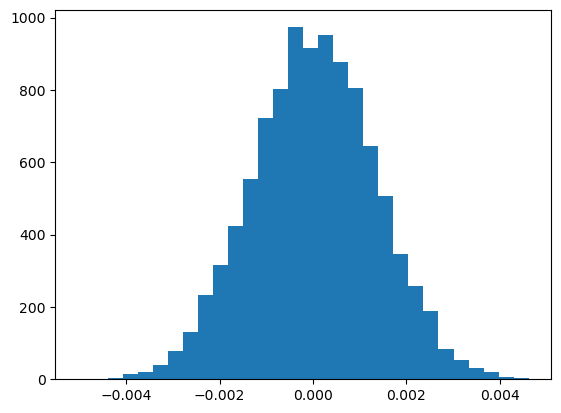

In [67]:
plt.hist(sampled_differences, bins=30)

Text(0.5, 1.0, 'Null distribution of differences in means (permutation test)')

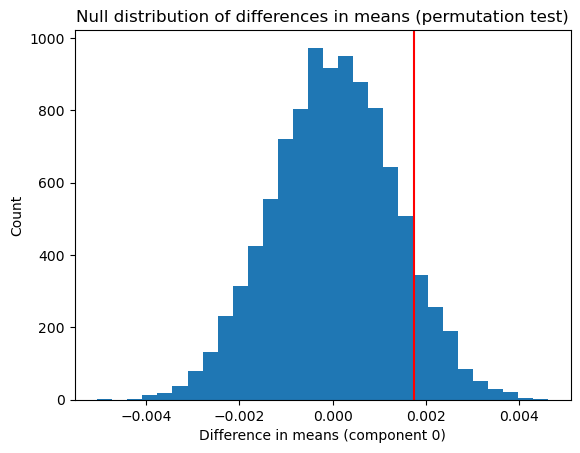

In [68]:
plt.hist(sampled_differences, bins=30)
plt.axvline(x=difference, color='red')
plt.xlabel('Difference in means (component 0)')
plt.ylabel('Count')
plt.title('Null distribution of differences in means (permutation test)')

In [69]:
np.mean(np.abs(sampled_differences) >= abs(difference))

np.float64(0.1861)

Thus, 3.7% of our permuted samples have a larger difference than our actual difference. This means that our difference is quite unlikely to have been generated under our baseline hypothesis and (if our significance threshold is 0.05), we reject this hypothesis.

#### t-test (parametric test)

As an alternative to this permutation test, we could also run a parametric test. In this case, we would make a distributional assumption about our data: that it is generated from a normal distribution. Our null hypothesis would be that the difference in means is zero. We can test for this using a "t-test".

In [70]:
from scipy import stats

In [71]:
stats.ttest_ind?

Signature:
stats.ttest_ind(
    a,
    b,
    *,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
    method=None,
    keepdims=False,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

.. deprecated:: 1.17.0
    Use of argument(s) ``{'keepdims', 'method', 'trim', 'equal_var', 'axis', 'alternative', 'nan_policy'}`` by position is deprecated; beginning in 
    SciPy 1.17.0, these will be keyword-only. Argument(s) ``{'permutations', 'random_state'}`` are deprecated, whether passed by position or keyword; they will be removed in SciPy 1.17.0. Use ``method`` to perform a permutation test.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, excep

In [72]:
stats.ttest_ind(components_subset[0, img_index_subset == '4'], components_subset[0, img_index_subset == '3'], equal_var=True)

TtestResult(statistic=np.float64(8.846988294952942), pvalue=np.float64(6.187526770388508e-16), df=np.float64(190.0))

### Problem

How could you test whether the mean of responses to images with index subset 4 is smaller than that of responses with index subset 3? How would you do this with a t-test and how would you do this with a permutation test?

In [73]:
# t-test: look through the documentation

stats.ttest_ind(components_subset[0, img_index_subset == '4'], components_subset[0, img_index_subset == '3'], equal_var=True, alternative='less')

TtestResult(statistic=np.float64(8.846988294952942), pvalue=np.float64(0.9999999999999997), df=np.float64(190.0))

In [74]:
# permutation test 

In [75]:
difference = components_subset[:, img_index_subset == '4'].mean() - components_subset[:, img_index_subset == '3'].mean()

In [76]:
difference

np.float32(0.0017516911)

In [78]:
np.mean(sampled_differences<=difference) # want to see how many times the sampled is different from the actual

np.float64(0.9048)

In [ ]:
# permutation test: copy code from above and adjust

sampled_differences = []
for _ in range(10000):
    img_index_shuffled = random_state.choice(img_index_subset, size=img_index_subset.shape[0], replace=False)
    diff = components_subset[:, img_index_shuffled == '4'].mean() - components_subset[:, img_index_shuffled == '3'].mean()
    sampled_differences.append(diff)
sampled_differences = np.array(sampled_differences)

How would you test whether the decoding performance of the SVM is significant?